In [91]:
#ndex2: download network from NDEx
import ndex2

network = ndex2.create_nice_cx_from_server('ndexbio.org', uuid='0f066d06-5d8e-11ea-bfdc-0ac135e8bacf')

In [44]:
#py4cytoscape: download network from NDEx
import py4cytoscape as py4

network_suid = py4.cy_ndex.import_network_from_ndex('0f066d06-5d8e-11ea-bfdc-0ac135e8bacf')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': '0f066d06-5d8e-11ea-bfdc-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


In [92]:
#ndex2: get a style template network and apply the style to the network
network.apply_template('ndexbio.org', '145a6a47-78ee-11e9-848d-0ac135e8bacf')

In [41]:
#py4cytoscape: get a style template network
py4.cy_ndex.import_network_from_ndex('145a6a47-78ee-11e9-848d-0ac135e8bacf')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': '145a6a47-78ee-11e9-848d-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


7893

In [45]:
#py4cytoscape: apply the style to the network
py4.styles.set_visual_style('NDEx default style v2-Style', network=network_suid)

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/apply/styles)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/apply/styles/NDEx%20default%20style%20v2-Style/8172)
[INFO] py4...S:  ǀOK[200]


{'message': 'Visual Style applied.'}

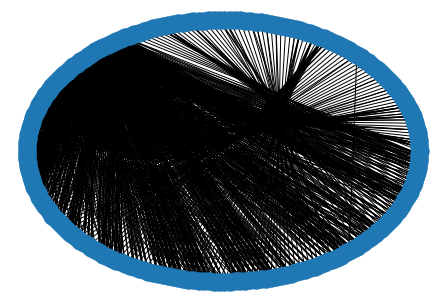

In [110]:
#ndex2: apply a layout to the network
import networkx as nx

#Get node ids to names map
node_name_to_id_map = {}
for node_id, node in network.get_nodes():
    node_name_to_id_map[node.get('n')] = node_id

#Make and view layout
networkx_network = network.to_networkx()
pos = nx.drawing.layout.circular_layout(networkx_network, scale=1000)
#networkx_network.graph['pos'] = pos
#Other layouts to try:
    #circular_layout
    #random_layout
    #spiral_layout
    #spring_layout
nx.draw(networkx_network, pos)

#Transfer layout back to original network
new_cartesian_layout = []
for node_name, coordinates in pos.items():
    new_cartesian_layout.append({
        'node': node_name_to_id_map[node_name],
        'x': coordinates[0],
        'y': coordinates[1]
    })
network.set_opaque_aspect('cartesianLayout', new_cartesian_layout)

In [48]:
#py4cytoscape: apply a layout to the network
py4.layouts.get_layout_names()
py4.layouts.layout_network('circular', network=network_suid)

[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/apply/layouts)
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/layout/circular), data: b'{"network": "SUID:8172"}'
[INFO] py4...S:  ǀOK[200]


{}

In [111]:
#ndex2: save the network to your account in NDEx
network.upload_to('ndexbio.org', 'sol015', 'test')

Generating CX


'http://public.ndexbio.org/v2/network/7823bfa1-b4aa-11ea-aaef-0ac135e8bacf'

In [50]:
#py4cytoscape: save the network to your account in NDEx
py4.cy_ndex.export_network_to_ndex('sol015', 'test', True, network=network_suid)

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks/8172), json: {'serverUrl': 'http://ndexbio.org/v2', 'username': 'sol015', 'password': 'test', 'metadata': None, 'isPublic': True}
[INFO] py4...S:  ǀOK[200]


'9a8e116d-b44b-11ea-aaef-0ac135e8bacf'

In [56]:
#ndex2: load protein interaction tabular data as a PPI network
import pandas as pd
ppi_data = pd.read_csv('~/Desktop/Untitled.sif', sep='\t', header = None)

ppi_network = ndex2.create_nice_cx_from_pandas(ppi_data)

In [58]:
#py4cytoscape: load protein interaction tabular data as a PPI network
py4.networks.import_network_from_file('/Users/sophieliu/Desktop/Untitled.sif')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/load%20file), data: b'{"file": "/Users/sophieliu/Desktop/Untitled.sif"}'
[INFO] py4...S:  ǀOK[200]


{'networks': [10677], 'views': [11698]}

In [13]:
#ndex2: annotate the PPI network with tabular gene expression data


In [ ]:
#py4cytoscape: annotate the PPI network with tabular gene expression data
